## **Multi-Layer Perceptrons and ARIMA Model for Time Series Forecasting**



### **1. Multi-Layer Perceptron**

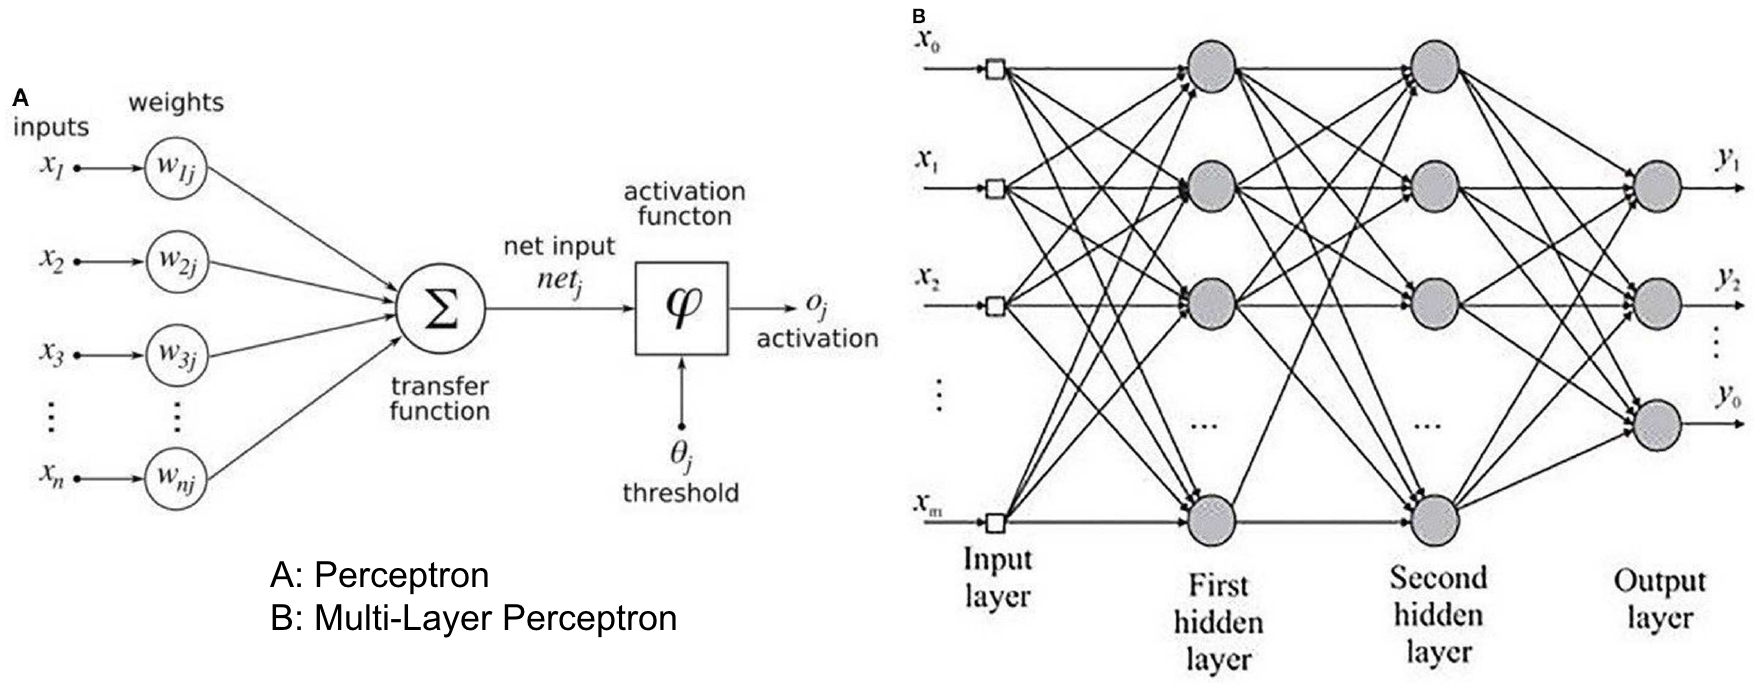

In [1]:
#Imports
import numpy as np
import tensorflow.keras
from keras.callbacks import History 
history = History()

/Users/eugeniedulout/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
# PREPROCESS DATA for input/output: split a univariate sequence into samples
# 3 inputs --> 1 output
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [73]:
# Define input sequence
raw_seq = [10, 20, 30, 40, 50, 60, 70, 80, 90]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

[10 20 30] 40
[20 30 40] 50
[30 40 50] 60
[40 50 60] 70
[50 60 70] 80
[60 70 80] 90


In [3]:
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers

### First model: perceptron (no hidden layer)

In [5]:
# Define the model
model = Sequential()
model.add(Dense(units=1, input_shape=(n_steps,),activation='relu'))
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [6]:
#Train the model via the Keras fit function
perceptron = model.fit(X, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 405ms/step - loss: 543.5694
Epoch 2/2000
1/1 [==============================] - 0s 10ms/step - loss: 536.8252
Epoch 3/2000
1/1 [==============================] - 0s 29ms/step - loss: 530.1243
Epoch 4/2000
1/1 [==============================] - 0s 11ms/step - loss: 523.4673
Epoch 5/2000
1/1 [==============================] - 0s 12ms/step - loss: 516.8550
Epoch 6/2000
1/1 [==============================] - 0s 11ms/step - loss: 510.2885
Epoch 7/2000
1/1 [==============================] - 0s 7ms/step - loss: 503.7680
Epoch 8/2000
1/1 [==============================] - 0s 5ms/step - loss: 497.2944
Epoch 9/2000
1/1 [==============================] - 0s 12ms/step - loss: 490.8684
Epoch 10/2000
1/1 [==============================] - 0s 8ms/step - loss: 484.4902
Epoch 11/2000
1/1 [==============================] - 0s 6ms/step - loss: 478.1607
Epoch 12/2000
1/1 [==============================] - 0s 17ms/step - loss: 471.8806
Epoch 13/2000
1/

1/1 [==============================] - 0s 9ms/step - loss: 116.1637
Epoch 101/2000
1/1 [==============================] - 0s 16ms/step - loss: 114.0303
Epoch 102/2000
1/1 [==============================] - 0s 10ms/step - loss: 111.9294
Epoch 103/2000
1/1 [==============================] - 0s 45ms/step - loss: 109.8607
Epoch 104/2000
1/1 [==============================] - 0s 16ms/step - loss: 107.8238
Epoch 105/2000
1/1 [==============================] - 0s 16ms/step - loss: 105.8182
Epoch 106/2000
1/1 [==============================] - 0s 13ms/step - loss: 103.8439
Epoch 107/2000
1/1 [==============================] - 0s 11ms/step - loss: 101.9004
Epoch 108/2000
1/1 [==============================] - 0s 8ms/step - loss: 99.9872
Epoch 109/2000
1/1 [==============================] - 0s 10ms/step - loss: 98.1041
Epoch 110/2000
1/1 [==============================] - 0s 7ms/step - loss: 96.2509
Epoch 111/2000
1/1 [==============================] - 0s 8ms/step - loss: 94.4269
Epoch 112/2000


1/1 [==============================] - 0s 13ms/step - loss: 14.3619
Epoch 200/2000
1/1 [==============================] - 0s 6ms/step - loss: 14.0385
Epoch 201/2000
1/1 [==============================] - 0s 7ms/step - loss: 13.7226
Epoch 202/2000
1/1 [==============================] - 0s 8ms/step - loss: 13.4138
Epoch 203/2000
1/1 [==============================] - 0s 8ms/step - loss: 13.1121
Epoch 204/2000
1/1 [==============================] - 0s 7ms/step - loss: 12.8174
Epoch 205/2000
1/1 [==============================] - 0s 8ms/step - loss: 12.5295
Epoch 206/2000
1/1 [==============================] - 0s 14ms/step - loss: 12.2483
Epoch 207/2000
1/1 [==============================] - 0s 9ms/step - loss: 11.9736
Epoch 208/2000
1/1 [==============================] - 0s 11ms/step - loss: 11.7054
Epoch 209/2000
1/1 [==============================] - 0s 11ms/step - loss: 11.4434
Epoch 210/2000
1/1 [==============================] - 0s 13ms/step - loss: 11.1876
Epoch 211/2000
1/1 [======

1/1 [==============================] - 0s 7ms/step - loss: 1.7428
Epoch 400/2000
1/1 [==============================] - 0s 9ms/step - loss: 1.7420
Epoch 401/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.7411
Epoch 402/2000
1/1 [==============================] - 0s 12ms/step - loss: 1.7403
Epoch 403/2000
1/1 [==============================] - 0s 8ms/step - loss: 1.7395
Epoch 404/2000
1/1 [==============================] - 0s 7ms/step - loss: 1.7387
Epoch 405/2000
1/1 [==============================] - 0s 14ms/step - loss: 1.7380
Epoch 406/2000
1/1 [==============================] - 0s 13ms/step - loss: 1.7372
Epoch 407/2000
1/1 [==============================] - 0s 12ms/step - loss: 1.7365
Epoch 408/2000
1/1 [==============================] - 0s 10ms/step - loss: 1.7358
Epoch 409/2000
1/1 [==============================] - 0s 20ms/step - loss: 1.7351
Epoch 410/2000
1/1 [==============================] - 0s 16ms/step - loss: 1.7345
Epoch 411/2000
1/1 [================

1/1 [==============================] - 0s 13ms/step - loss: 1.6672
Epoch 600/2000
1/1 [==============================] - 0s 12ms/step - loss: 1.6669
Epoch 601/2000
1/1 [==============================] - 0s 15ms/step - loss: 1.6666
Epoch 602/2000
1/1 [==============================] - 0s 10ms/step - loss: 1.6662
Epoch 603/2000
1/1 [==============================] - 0s 13ms/step - loss: 1.6659
Epoch 604/2000
1/1 [==============================] - 0s 14ms/step - loss: 1.6655
Epoch 605/2000
1/1 [==============================] - 0s 15ms/step - loss: 1.6652
Epoch 606/2000
1/1 [==============================] - 0s 14ms/step - loss: 1.6649
Epoch 607/2000
1/1 [==============================] - 0s 13ms/step - loss: 1.6645
Epoch 608/2000
1/1 [==============================] - 0s 16ms/step - loss: 1.6642
Epoch 609/2000
1/1 [==============================] - 0s 11ms/step - loss: 1.6638
Epoch 610/2000
1/1 [==============================] - 0s 7ms/step - loss: 1.6635
Epoch 611/2000
1/1 [============

1/1 [==============================] - 0s 13ms/step - loss: 1.5935
Epoch 800/2000
1/1 [==============================] - 0s 23ms/step - loss: 1.5931
Epoch 801/2000
1/1 [==============================] - 0s 11ms/step - loss: 1.5927
Epoch 802/2000
1/1 [==============================] - 0s 10ms/step - loss: 1.5923
Epoch 803/2000
1/1 [==============================] - 0s 11ms/step - loss: 1.5919
Epoch 804/2000
1/1 [==============================] - 0s 9ms/step - loss: 1.5915
Epoch 805/2000
1/1 [==============================] - 0s 13ms/step - loss: 1.5911
Epoch 806/2000
1/1 [==============================] - 0s 9ms/step - loss: 1.5908
Epoch 807/2000
1/1 [==============================] - 0s 9ms/step - loss: 1.5904
Epoch 808/2000
1/1 [==============================] - 0s 10ms/step - loss: 1.5900
Epoch 809/2000
1/1 [==============================] - 0s 12ms/step - loss: 1.5896
Epoch 810/2000
1/1 [==============================] - 0s 11ms/step - loss: 1.5892
Epoch 811/2000
1/1 [==============

1/1 [==============================] - 0s 8ms/step - loss: 1.5094
Epoch 1000/2000
1/1 [==============================] - 0s 10ms/step - loss: 1.5089
Epoch 1001/2000
1/1 [==============================] - 0s 7ms/step - loss: 1.5085
Epoch 1002/2000
1/1 [==============================] - 0s 10ms/step - loss: 1.5080
Epoch 1003/2000
1/1 [==============================] - 0s 7ms/step - loss: 1.5076
Epoch 1004/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.5071
Epoch 1005/2000
1/1 [==============================] - 0s 10ms/step - loss: 1.5067
Epoch 1006/2000
1/1 [==============================] - 0s 12ms/step - loss: 1.5062
Epoch 1007/2000
1/1 [==============================] - 0s 10ms/step - loss: 1.5058
Epoch 1008/2000
1/1 [==============================] - 0s 11ms/step - loss: 1.5053
Epoch 1009/2000
1/1 [==============================] - 0s 10ms/step - loss: 1.5049
Epoch 1010/2000
1/1 [==============================] - 0s 12ms/step - loss: 1.5045
Epoch 1011/2000
1/1 [===

1/1 [==============================] - 0s 16ms/step - loss: 1.4173
Epoch 1198/2000
1/1 [==============================] - 0s 16ms/step - loss: 1.4168
Epoch 1199/2000
1/1 [==============================] - 0s 15ms/step - loss: 1.4163
Epoch 1200/2000
1/1 [==============================] - 0s 8ms/step - loss: 1.4158
Epoch 1201/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.4154
Epoch 1202/2000
1/1 [==============================] - 0s 8ms/step - loss: 1.4149
Epoch 1203/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.4144
Epoch 1204/2000
1/1 [==============================] - 0s 11ms/step - loss: 1.4139
Epoch 1205/2000
1/1 [==============================] - 0s 8ms/step - loss: 1.4134
Epoch 1206/2000
1/1 [==============================] - 0s 8ms/step - loss: 1.4129
Epoch 1207/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.4124
Epoch 1208/2000
1/1 [==============================] - 0s 9ms/step - loss: 1.4120
Epoch 1209/2000
1/1 [=======

1/1 [==============================] - 0s 18ms/step - loss: 1.3181
Epoch 1396/2000
1/1 [==============================] - 0s 8ms/step - loss: 1.3176
Epoch 1397/2000
1/1 [==============================] - 0s 12ms/step - loss: 1.3171
Epoch 1398/2000
1/1 [==============================] - 0s 21ms/step - loss: 1.3166
Epoch 1399/2000
1/1 [==============================] - 0s 12ms/step - loss: 1.3161
Epoch 1400/2000
1/1 [==============================] - 0s 9ms/step - loss: 1.3156
Epoch 1401/2000
1/1 [==============================] - 0s 8ms/step - loss: 1.3150
Epoch 1402/2000
1/1 [==============================] - 0s 12ms/step - loss: 1.3145
Epoch 1403/2000
1/1 [==============================] - 0s 10ms/step - loss: 1.3140
Epoch 1404/2000
1/1 [==============================] - 0s 13ms/step - loss: 1.3135
Epoch 1405/2000
1/1 [==============================] - 0s 11ms/step - loss: 1.3130
Epoch 1406/2000
1/1 [==============================] - 0s 10ms/step - loss: 1.3125
Epoch 1407/2000
1/1 [==

1/1 [==============================] - 0s 7ms/step - loss: 1.2135
Epoch 1594/2000
1/1 [==============================] - 0s 11ms/step - loss: 1.2129
Epoch 1595/2000
1/1 [==============================] - 0s 9ms/step - loss: 1.2124
Epoch 1596/2000
1/1 [==============================] - 0s 7ms/step - loss: 1.2119
Epoch 1597/2000
1/1 [==============================] - 0s 9ms/step - loss: 1.2113
Epoch 1598/2000
1/1 [==============================] - 0s 10ms/step - loss: 1.2108
Epoch 1599/2000
1/1 [==============================] - 0s 10ms/step - loss: 1.2102
Epoch 1600/2000
1/1 [==============================] - 0s 18ms/step - loss: 1.2097
Epoch 1601/2000
1/1 [==============================] - 0s 18ms/step - loss: 1.2092
Epoch 1602/2000
1/1 [==============================] - 0s 23ms/step - loss: 1.2086
Epoch 1603/2000
1/1 [==============================] - 0s 15ms/step - loss: 1.2081
Epoch 1604/2000
1/1 [==============================] - 0s 15ms/step - loss: 1.2075
Epoch 1605/2000
1/1 [===

1/1 [==============================] - 0s 9ms/step - loss: 1.1050
Epoch 1792/2000
1/1 [==============================] - 0s 8ms/step - loss: 1.1044
Epoch 1793/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.1039
Epoch 1794/2000
1/1 [==============================] - 0s 7ms/step - loss: 1.1033
Epoch 1795/2000
1/1 [==============================] - 0s 8ms/step - loss: 1.1028
Epoch 1796/2000
1/1 [==============================] - 0s 8ms/step - loss: 1.1022
Epoch 1797/2000
1/1 [==============================] - 0s 9ms/step - loss: 1.1016
Epoch 1798/2000
1/1 [==============================] - 0s 5ms/step - loss: 1.1011
Epoch 1799/2000
1/1 [==============================] - 0s 7ms/step - loss: 1.1005
Epoch 1800/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.1000
Epoch 1801/2000
1/1 [==============================] - 0s 10ms/step - loss: 1.0994
Epoch 1802/2000
1/1 [==============================] - 0s 6ms/step - loss: 1.0989
Epoch 1803/2000
1/1 [==========

1/1 [==============================] - 0s 22ms/step - loss: 0.9944
Epoch 1990/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.9938
Epoch 1991/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.9932
Epoch 1992/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.9927
Epoch 1993/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.9921
Epoch 1994/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.9916
Epoch 1995/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.9910
Epoch 1996/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.9904
Epoch 1997/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.9899
Epoch 1998/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.9893
Epoch 1999/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.9888
Epoch 2000/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.9882


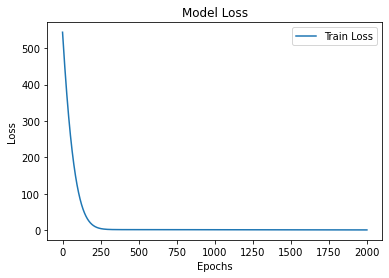

In [7]:
#Plot the training loss using information from the above model training step
import matplotlib.pyplot as plt

loss = perceptron.history['loss']

plt.plot(perceptron.history['loss'], label='Train Loss')

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show();

In [8]:
x_input = np.array([70, 80, 90]) # predict the output for this input
x_input = x_input.reshape((1, n_steps))
y_pred = model.predict(x_input)
print('y_pred=',y_pred)

1/1 [==============================] - 0s 72ms/step
y_pred= [[101.5547]]


In [15]:
error = ((y_pred[0][0]-100)/y_pred[0][0])*100

print('The expected value is 100, the relative error is ', error, '% which seems reasonable for a perceptron with no hidden layers.')

The expected value is 100, the relative error is  1.5309017864803023 % which seems reasonable for a perceptron with no hidden layers.


### Second model: MLP (one hidden layer)

In [76]:
# Define the MLP model
model_MLP = Sequential()
model_MLP.add(Dense(units=64, input_shape=(n_steps,),activation='relu'))
model_MLP.add(Dense(1))
model_MLP.compile(optimizer='adam', loss='mse')
model_MLP.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [77]:
# Train MLP model

history = model_MLP.fit(X, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 0s 399ms/step - loss: 4047.3564
Epoch 2/2000
1/1 [==============================] - 0s 8ms/step - loss: 3913.4832
Epoch 3/2000
1/1 [==============================] - 0s 6ms/step - loss: 3780.9309
Epoch 4/2000
1/1 [==============================] - 0s 16ms/step - loss: 3649.9016
Epoch 5/2000
1/1 [==============================] - 0s 18ms/step - loss: 3521.0706
Epoch 6/2000
1/1 [==============================] - 0s 17ms/step - loss: 3394.0225
Epoch 7/2000
1/1 [==============================] - 0s 20ms/step - loss: 3269.2546
Epoch 8/2000
1/1 [==============================] - 0s 9ms/step - loss: 3146.0950
Epoch 9/2000
1/1 [==============================] - 0s 16ms/step - loss: 3025.2156
Epoch 10/2000
1/1 [==============================] - 0s 5ms/step - loss: 2906.7285
Epoch 11/2000
1/1 [==============================] - 0s 11ms/step - loss: 2790.9011
Epoch 12/2000
1/1 [==============================] - 0s 12ms/step - loss: 2677.5061
Epoc

1/1 [==============================] - 0s 10ms/step - loss: 35.4174
Epoch 200/2000
1/1 [==============================] - 0s 4ms/step - loss: 35.3903
Epoch 201/2000
1/1 [==============================] - 0s 7ms/step - loss: 35.3631
Epoch 202/2000
1/1 [==============================] - 0s 6ms/step - loss: 35.3358
Epoch 203/2000
1/1 [==============================] - 0s 6ms/step - loss: 35.3085
Epoch 204/2000
1/1 [==============================] - 0s 10ms/step - loss: 35.2812
Epoch 205/2000
1/1 [==============================] - 0s 11ms/step - loss: 35.2538
Epoch 206/2000
1/1 [==============================] - 0s 18ms/step - loss: 35.2263
Epoch 207/2000
1/1 [==============================] - 0s 18ms/step - loss: 35.1988
Epoch 208/2000
1/1 [==============================] - 0s 18ms/step - loss: 35.1712
Epoch 209/2000
1/1 [==============================] - 0s 15ms/step - loss: 35.1435
Epoch 210/2000
1/1 [==============================] - 0s 8ms/step - loss: 35.1159
Epoch 211/2000
1/1 [====

1/1 [==============================] - 0s 11ms/step - loss: 29.5126
Epoch 398/2000
1/1 [==============================] - 0s 11ms/step - loss: 29.4814
Epoch 399/2000
1/1 [==============================] - 0s 6ms/step - loss: 29.4502
Epoch 400/2000
1/1 [==============================] - 0s 7ms/step - loss: 29.4189
Epoch 401/2000
1/1 [==============================] - 0s 10ms/step - loss: 29.3876
Epoch 402/2000
1/1 [==============================] - 0s 5ms/step - loss: 29.3563
Epoch 403/2000
1/1 [==============================] - 0s 7ms/step - loss: 29.3249
Epoch 404/2000
1/1 [==============================] - 0s 7ms/step - loss: 29.2935
Epoch 405/2000
1/1 [==============================] - 0s 6ms/step - loss: 29.2621
Epoch 406/2000
1/1 [==============================] - 0s 8ms/step - loss: 29.2307
Epoch 407/2000
1/1 [==============================] - 0s 8ms/step - loss: 29.1992
Epoch 408/2000
1/1 [==============================] - 0s 5ms/step - loss: 29.1678
Epoch 409/2000
1/1 [========

1/1 [==============================] - 0s 8ms/step - loss: 22.9473
Epoch 596/2000
1/1 [==============================] - 0s 4ms/step - loss: 22.9128
Epoch 597/2000
1/1 [==============================] - 0s 7ms/step - loss: 22.8784
Epoch 598/2000
1/1 [==============================] - 0s 6ms/step - loss: 22.8439
Epoch 599/2000
1/1 [==============================] - 0s 8ms/step - loss: 22.8094
Epoch 600/2000
1/1 [==============================] - 0s 4ms/step - loss: 22.7750
Epoch 601/2000
1/1 [==============================] - 0s 6ms/step - loss: 22.7405
Epoch 602/2000
1/1 [==============================] - 0s 5ms/step - loss: 22.7060
Epoch 603/2000
1/1 [==============================] - 0s 7ms/step - loss: 22.6715
Epoch 604/2000
1/1 [==============================] - 0s 5ms/step - loss: 22.6370
Epoch 605/2000
1/1 [==============================] - 0s 8ms/step - loss: 22.6025
Epoch 606/2000
1/1 [==============================] - 0s 10ms/step - loss: 22.5680
Epoch 607/2000
1/1 [==========

1/1 [==============================] - 0s 4ms/step - loss: 16.1368
Epoch 794/2000
1/1 [==============================] - 0s 7ms/step - loss: 16.1031
Epoch 795/2000
1/1 [==============================] - 0s 5ms/step - loss: 16.0695
Epoch 796/2000
1/1 [==============================] - 0s 7ms/step - loss: 16.0359
Epoch 797/2000
1/1 [==============================] - 0s 6ms/step - loss: 16.0023
Epoch 798/2000
1/1 [==============================] - 0s 4ms/step - loss: 15.9687
Epoch 799/2000
1/1 [==============================] - 0s 4ms/step - loss: 15.9351
Epoch 800/2000
1/1 [==============================] - 0s 7ms/step - loss: 15.9015
Epoch 801/2000
1/1 [==============================] - 0s 8ms/step - loss: 15.8680
Epoch 802/2000
1/1 [==============================] - 0s 7ms/step - loss: 15.8345
Epoch 803/2000
1/1 [==============================] - 0s 8ms/step - loss: 15.8010
Epoch 804/2000
1/1 [==============================] - 0s 5ms/step - loss: 15.7675
Epoch 805/2000
1/1 [===========

1/1 [==============================] - 0s 14ms/step - loss: 9.9038
Epoch 992/2000
1/1 [==============================] - 0s 4ms/step - loss: 9.8752
Epoch 993/2000
1/1 [==============================] - 0s 7ms/step - loss: 9.8467
Epoch 994/2000
1/1 [==============================] - 0s 8ms/step - loss: 9.8182
Epoch 995/2000
1/1 [==============================] - 0s 5ms/step - loss: 9.7897
Epoch 996/2000
1/1 [==============================] - 0s 4ms/step - loss: 9.7613
Epoch 997/2000
1/1 [==============================] - 0s 6ms/step - loss: 9.7329
Epoch 998/2000
1/1 [==============================] - 0s 7ms/step - loss: 9.7046
Epoch 999/2000
1/1 [==============================] - 0s 6ms/step - loss: 9.6763
Epoch 1000/2000
1/1 [==============================] - 0s 6ms/step - loss: 9.6480
Epoch 1001/2000
1/1 [==============================] - 0s 6ms/step - loss: 9.6197
Epoch 1002/2000
1/1 [==============================] - 0s 9ms/step - loss: 9.5915
Epoch 1003/2000
1/1 [==================

1/1 [==============================] - 0s 34ms/step - loss: 5.0561
Epoch 1190/2000
1/1 [==============================] - 0s 10ms/step - loss: 5.0362
Epoch 1191/2000
1/1 [==============================] - 0s 9ms/step - loss: 5.0163
Epoch 1192/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.9964
Epoch 1193/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.9766
Epoch 1194/2000
1/1 [==============================] - 0s 6ms/step - loss: 4.9569
Epoch 1195/2000
1/1 [==============================] - 0s 7ms/step - loss: 4.9372
Epoch 1196/2000
1/1 [==============================] - 0s 15ms/step - loss: 4.9176
Epoch 1197/2000
1/1 [==============================] - 0s 11ms/step - loss: 4.8980
Epoch 1198/2000
1/1 [==============================] - 0s 7ms/step - loss: 4.8784
Epoch 1199/2000
1/1 [==============================] - 0s 12ms/step - loss: 4.8589
Epoch 1200/2000
1/1 [==============================] - 0s 7ms/step - loss: 4.8394
Epoch 1201/2000
1/1 [======

1/1 [==============================] - 0s 8ms/step - loss: 2.0423
Epoch 1388/2000
1/1 [==============================] - 0s 8ms/step - loss: 2.0316
Epoch 1389/2000
1/1 [==============================] - 0s 7ms/step - loss: 2.0209
Epoch 1390/2000
1/1 [==============================] - 0s 8ms/step - loss: 2.0103
Epoch 1391/2000
1/1 [==============================] - 0s 8ms/step - loss: 1.9998
Epoch 1392/2000
1/1 [==============================] - 0s 8ms/step - loss: 1.9893
Epoch 1393/2000
1/1 [==============================] - 0s 14ms/step - loss: 1.9788
Epoch 1394/2000
1/1 [==============================] - 0s 9ms/step - loss: 1.9684
Epoch 1395/2000
1/1 [==============================] - 0s 31ms/step - loss: 1.9580
Epoch 1396/2000
1/1 [==============================] - 0s 27ms/step - loss: 1.9476
Epoch 1397/2000
1/1 [==============================] - 0s 10ms/step - loss: 1.9373
Epoch 1398/2000
1/1 [==============================] - 0s 8ms/step - loss: 1.9270
Epoch 1399/2000
1/1 [=======

1/1 [==============================] - 0s 12ms/step - loss: 0.6295
Epoch 1586/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6254
Epoch 1587/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.6212
Epoch 1588/2000
1/1 [==============================] - 0s 15ms/step - loss: 0.6171
Epoch 1589/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.6130
Epoch 1590/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.6089
Epoch 1591/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.6048
Epoch 1592/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6008
Epoch 1593/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.5968
Epoch 1594/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.5928
Epoch 1595/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.5888
Epoch 1596/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.5848
Epoch 1597/2000
1/1 [==

1/1 [==============================] - 0s 21ms/step - loss: 0.1463
Epoch 1784/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.1451
Epoch 1785/2000
1/1 [==============================] - 0s 17ms/step - loss: 0.1439
Epoch 1786/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.1427
Epoch 1787/2000
1/1 [==============================] - 0s 57ms/step - loss: 0.1416
Epoch 1788/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1404
Epoch 1789/2000
1/1 [==============================] - 0s 30ms/step - loss: 0.1393
Epoch 1790/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.1382
Epoch 1791/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.1371
Epoch 1792/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.1360
Epoch 1793/2000
1/1 [==============================] - 0s 16ms/step - loss: 0.1348
Epoch 1794/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.1338
Epoch 1795/2000
1/1 [==

1/1 [==============================] - 0s 12ms/step - loss: 0.0257
Epoch 1982/2000
1/1 [==============================] - 0s 15ms/step - loss: 0.0255
Epoch 1983/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.0252
Epoch 1984/2000
1/1 [==============================] - 0s 15ms/step - loss: 0.0250
Epoch 1985/2000
1/1 [==============================] - 0s 31ms/step - loss: 0.0248
Epoch 1986/2000
1/1 [==============================] - 0s 28ms/step - loss: 0.0245
Epoch 1987/2000
1/1 [==============================] - 0s 21ms/step - loss: 0.0243
Epoch 1988/2000
1/1 [==============================] - 0s 25ms/step - loss: 0.0241
Epoch 1989/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0238
Epoch 1990/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0236
Epoch 1991/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0234
Epoch 1992/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.0232
Epoch 1993/2000
1/1 [=

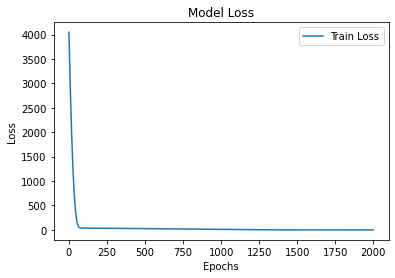

In [78]:
#Plot the training loss using information from the above model training step
import matplotlib.pyplot as plt

loss = history.history['loss']

plt.plot(history.history['loss'], label='Train Loss')


plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='upper right')
plt.show();

In [89]:
x_input = np.array([70, 80, 90]) # predict the output for this input
x_input = x_input.reshape((1, n_steps))
y_pred = model_MLP.predict(x_input)
print('y_pred=',y_pred)

1/1 [==============================] - 0s 25ms/step
y_pred= [[100.23124]]


In [90]:
error = ((y_pred[0][0]-100)/y_pred[0][0])*100

print('The expected value is 100, the relative error is ', error, '% which is satisfying. Adding hidden layers improve the accuracy of the model compared to a single perceptron. ')

The expected value is 100, the relative error is  0.23070583624338528 % which is satisfying. Adding hidden layers improve the accuracy of the model compared to a single perceptron. 


#### Neurons
In this model, there are 3 neurons in the input, 128 neurons in the first hidden layer and 1 neuron in the last layer. All together there are 132 neurons.

#### Weights

Input layer: there are 128 weights for each neuron, therefore the weights are equal to 3x128 = 384.
Hidden layer: there are one connection for each neuron plus one bias weight for each neuron. The number of weights is 128*2 = 256.
Hidden layer: there is one bias weight for the neuron. The weight is 1.

The total number of weights is 384+256+1=641.

#### Parameters
There are also 641 learnable parameters in the model.

This correspond to the output of the model summary.

In [31]:
model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 3)]               0         
                                                                 
 dense_3 (Dense)             (None, 128)               512       
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


### **2. Medical Expenditures Dataset** 
[Source: https://www.frontiersin.org/articles/10.3389/fdata.2020.00004/full]. This dataset contains average daily expenditures on a medicine. 

In [13]:
#GET THE DATA 
import pandas as pd
data = pd.read_csv("dataSheet2.csv")
data.head()

,Date,Average Daily Expenditure on Medicine B in Dollars
0,1/2/2011,114.874671
1,1/3/2011,112.041149
2,1/4/2011,167.311618
3,1/5/2011,241.058332
4,1/6/2011,124.520457


In [14]:
import numpy as np
#JUST GET THE MEDICINE EXPENDITURE VALUES
data1 = data["Average Daily Expenditure on Medicine B in Dollars"]
data1Arr = np.array(data1)
print(data1.shape)
print(data1Arr.shape)

(1565,)
(1565,)


In [15]:
#DIFFERENT WAY OF SPLITTING DATA INTO INPUT/OUTPUT SEQUENCES
def convert2matrix(data_arr, look_back):
 X, Y =[], []
 for i in range(len(data_arr)-look_back):
  d=i+look_back
  X.append(data_arr[i:d])
  Y.append(data_arr[d])
 return np.array(X), np.array(Y)

In [16]:
#Split data set into testing dataset and train dataset
train_size = int(len(data1Arr) * 0.8) #80% training, 20% testing
train = data1Arr[0:train_size]
test = data1Arr[train_size:len(data1Arr)]
print(train.shape)
print(test.shape)
# setup look_back window
look_back = 7
#convert dataset into right shape in order to input into the DNN
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

#Print a few of the samples to check format
for i in range(5):
  print(trainX[i], trainY[i])

(1252,)
(313,)
[114.8746706 112.0411489 167.3116175 241.0583317 124.5204571 113.8333722
 149.2555453] 159.0992442
[112.0411489 167.3116175 241.0583317 124.5204571 113.8333722 149.2555453
 159.0992442] 187.9188007
[167.3116175 241.0583317 124.5204571 113.8333722 149.2555453 159.0992442
 187.9188007] 138.774122
[241.0583317 124.5204571 113.8333722 149.2555453 159.0992442 187.9188007
 138.774122 ] 176.4914938
[124.5204571 113.8333722 149.2555453 159.0992442 187.9188007 138.774122
 176.4914938] 165.7128948


#### METHOD

Referring to the original article 'AI in healthcare: Time series Forecasting using statistical, neural, and ensemble architectures', we decide to vary the number of hidden layers between (2, 3, 4), the number of neurons per layer between (8, 64, 256) and the number of epochs between (16, 128, 256). To avoid training 27 models, we will start by training on different layers numbers, then number of neurons, and finally number of epochs.

#### IMPACT OF LOOK-BACK TIME-STEPS
The look-back time steps define the batch size. A look-back time step too large might lead to overfitting of the model and to not enough noise in the batches. It also takes up more memory and may lead to slower computation time. However, a look-back time step too small will lead to too much noise for the gradient estimate and poor convergence of the loss. Therefore, there must be a trade-off between accuracy and speed for the look-back time steps.

In [86]:
# Define model

n_layers = [2,3,4]

models_layers = []

for i in range(len(n_layers)):
    tf.keras.backend.clear_session()
    layers = []                                          #contains all layers to facilitate access to last layer
                                                         #created in API
    
    inputs = Input(shape=(look_back,))                   #input layer with look_back size
    layers.append(inputs)                                #add input to layer list 
    
    for j in range(n_layers[i]):
        
        dense = Dense(8, activation='relu')(layers[j]) #we start with 8 neurons; we will adapt the neurons number
        layers.append(dense)                             #later
                                                         #here we add 2, 3, or 4 layers to the model, each connected
                                                         #to the previous layer
                    
    dense = Dense(1, activation='relu')(dense)           #last layer
    model = Model(inputs = inputs, outputs=dense)        #create model
    models_layers.append(model)    

In [87]:
# We are using rmse 

from keras import backend as K
def rmse(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 
    
mlp_layers = []
for i in range(len(models_layers)):
    tf.keras.backend.clear_session()
    model = models_layers[i]
    model.compile(optimizer='adam', loss=rmse) 
    history = model.fit(trainX, trainY, epochs=128, validation_split=0.2)
    mlp_layers.append(history)

Epoch 1/128
32/32 [==============================] - 1s 16ms/step - loss: 145.3634 - val_loss: 128.7810
Epoch 2/128
32/32 [==============================] - 0s 4ms/step - loss: 71.8039 - val_loss: 46.2525
Epoch 3/128
32/32 [==============================] - 0s 3ms/step - loss: 46.4011 - val_loss: 42.8001
Epoch 4/128
32/32 [==============================] - 0s 4ms/step - loss: 45.4210 - val_loss: 42.4574
Epoch 5/128
32/32 [==============================] - 0s 3ms/step - loss: 44.7995 - val_loss: 41.9949
Epoch 6/128
32/32 [==============================] - 0s 3ms/step - loss: 44.2122 - val_loss: 41.4079
Epoch 7/128
32/32 [==============================] - 0s 3ms/step - loss: 43.9410 - val_loss: 40.9226
Epoch 8/128
32/32 [==============================] - 0s 3ms/step - loss: 43.2223 - val_loss: 40.5484
Epoch 9/128
32/32 [==============================] - 0s 3ms/step - loss: 42.7606 - val_loss: 40.1670
Epoch 10/128
32/32 [==============================] - 0s 3ms/step - loss: 42.1395 - val_

32/32 [==============================] - 0s 3ms/step - loss: 36.2646 - val_loss: 34.5821
Epoch 34/128
32/32 [==============================] - 0s 3ms/step - loss: 36.7171 - val_loss: 35.2056
Epoch 35/128
32/32 [==============================] - 0s 3ms/step - loss: 36.3137 - val_loss: 34.9892
Epoch 36/128
32/32 [==============================] - 0s 3ms/step - loss: 36.6637 - val_loss: 34.2664
Epoch 37/128
32/32 [==============================] - 0s 3ms/step - loss: 36.5036 - val_loss: 34.3824
Epoch 38/128
32/32 [==============================] - 0s 3ms/step - loss: 36.3659 - val_loss: 34.3391
Epoch 39/128
32/32 [==============================] - 0s 3ms/step - loss: 36.3570 - val_loss: 34.3632
Epoch 40/128
32/32 [==============================] - 0s 3ms/step - loss: 36.0822 - val_loss: 34.2508
Epoch 41/128
32/32 [==============================] - 0s 3ms/step - loss: 36.3471 - val_loss: 34.2148
Epoch 42/128
32/32 [==============================] - 0s 3ms/step - loss: 36.0455 - val_loss: 3

32/32 [==============================] - 0s 3ms/step - loss: 36.3748 - val_loss: 33.8343
Epoch 66/128
32/32 [==============================] - 0s 3ms/step - loss: 36.1014 - val_loss: 34.6989
Epoch 67/128
32/32 [==============================] - 0s 3ms/step - loss: 36.3829 - val_loss: 33.8697
Epoch 68/128
32/32 [==============================] - 0s 3ms/step - loss: 36.2782 - val_loss: 33.8739
Epoch 69/128
32/32 [==============================] - 0s 3ms/step - loss: 36.3287 - val_loss: 34.5470
Epoch 70/128
32/32 [==============================] - 0s 3ms/step - loss: 36.3324 - val_loss: 34.6352
Epoch 71/128
32/32 [==============================] - 0s 3ms/step - loss: 36.3457 - val_loss: 34.1380
Epoch 72/128
32/32 [==============================] - 0s 3ms/step - loss: 36.4171 - val_loss: 33.9039
Epoch 73/128
32/32 [==============================] - 0s 3ms/step - loss: 36.5807 - val_loss: 34.0048
Epoch 74/128
32/32 [==============================] - 0s 3ms/step - loss: 36.2215 - val_loss: 3

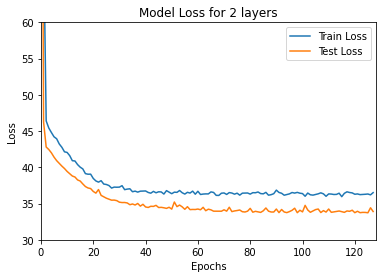

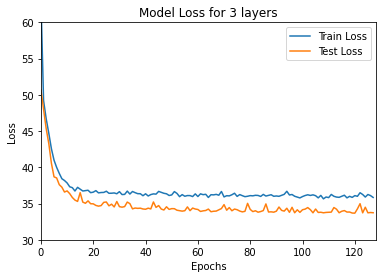

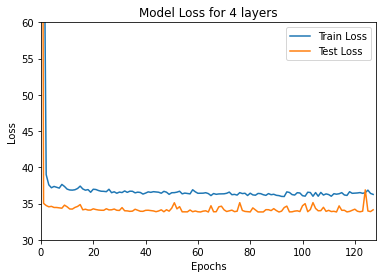

In [88]:
#PLOT THE TRAINING LOSS
import matplotlib.pyplot as plt


for i in range(len(mlp_layers)):
    mlp_history = mlp_layers[i]
    loss = mlp_history.history['loss']
    val_loss = mlp_history.history['val_loss']

    plt.plot(mlp_history.history['loss'], label='Train Loss')
    plt.plot(mlp_history.history['val_loss'], label='Test Loss')
    
    plt.title('Model Loss for '+str(n_layers[i])+' layers')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(loc='upper right')
    ax = plt.gca()
    ax.set_xlim([0, 128])
    ax.set_ylim([30, 60])
    plt.show();

In [89]:
#MODEL EVALUATION via RMSE
for i in range(len(n_layers)):
    print('Model with', n_layers[i], 'layers:')
    train_score = models_layers[i].evaluate(trainX, trainY, verbose=0)
    print('Train Root Mean Squared Error(RMSE): ', train_score)
    test_score = models_layers[i].evaluate(testX, testY, verbose=0)
    print('Test Root Mean Squared Error(RMSE): ', test_score)

Model with 2 layers:
Train Root Mean Squared Error(RMSE):  35.76902770996094
Test Root Mean Squared Error(RMSE):  40.534881591796875
Model with 3 layers:
Train Root Mean Squared Error(RMSE):  35.45905685424805
Test Root Mean Squared Error(RMSE):  40.963008880615234
Model with 4 layers:
Train Root Mean Squared Error(RMSE):  35.833648681640625
Test Root Mean Squared Error(RMSE):  40.79385757446289


The best loss is for 4 layers as it converges the fastest (below 40 after only 2 epochs). Let's now try with different number of neurons for each hidden layer.

#### #2 NEURONS

In [76]:
# Define model

n_neurons = [8, 64, 256]

models_neurons = []

for i in range(len(n_neurons)):
    tf.keras.backend.clear_session()
    layers = []                                          #contains all layers to facilitate access to last layer
                                                         #created in API
    
    inputs = Input(shape=(look_back,))                   #input layer with look_back size
    layers.append(inputs)                                #add input to layer list 
    
    for j in range(4):
        
        dense = Dense(n_neurons[i], activation='relu')(layers[j]) # try different number of neurons
        layers.append(dense)                             
                                                         
                    
    dense = Dense(1, activation='relu')(dense)           #last layer
    model = Model(inputs = inputs, outputs=dense)        #create model
    models_neurons.append(model)    

In [77]:
# Train for different numbers of neurons

from keras import backend as K
def rmse(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

mlp_neurons = []
for i in range(len(models_neurons)):
    tf.keras.backend.clear_session()
    model = models_neurons[i]
    model.compile(optimizer='adam', loss=rmse) 
    history = model.fit(trainX, trainY, epochs=128, validation_split=0.2)
    mlp_neurons.append(history)

Epoch 1/128
32/32 [==============================] - 1s 8ms/step - loss: 190.6226 - val_loss: 251.5889
Epoch 2/128
32/32 [==============================] - 0s 5ms/step - loss: 153.1524 - val_loss: 100.3226
Epoch 3/128
32/32 [==============================] - 0s 4ms/step - loss: 45.7899 - val_loss: 36.7264
Epoch 4/128
32/32 [==============================] - 0s 3ms/step - loss: 38.0235 - val_loss: 36.4391
Epoch 5/128
32/32 [==============================] - 0s 5ms/step - loss: 37.5328 - val_loss: 35.8107
Epoch 6/128
32/32 [==============================] - 0s 3ms/step - loss: 37.1209 - val_loss: 35.5756
Epoch 7/128
32/32 [==============================] - 0s 4ms/step - loss: 37.1876 - val_loss: 35.5905
Epoch 8/128
32/32 [==============================] - 0s 3ms/step - loss: 37.0388 - val_loss: 35.5879
Epoch 9/128
32/32 [==============================] - 0s 3ms/step - loss: 37.2507 - val_loss: 35.8316
Epoch 10/128
32/32 [==============================] - 0s 4ms/step - loss: 36.8439 - val

32/32 [==============================] - 0s 3ms/step - loss: 36.2307 - val_loss: 33.9797
Epoch 34/128
32/32 [==============================] - 0s 3ms/step - loss: 37.1675 - val_loss: 35.4818
Epoch 35/128
32/32 [==============================] - 0s 3ms/step - loss: 35.7972 - val_loss: 36.6717
Epoch 36/128
32/32 [==============================] - 0s 3ms/step - loss: 35.6125 - val_loss: 33.8508
Epoch 37/128
32/32 [==============================] - 0s 3ms/step - loss: 35.6450 - val_loss: 34.6646
Epoch 38/128
32/32 [==============================] - 0s 3ms/step - loss: 35.7971 - val_loss: 34.0375
Epoch 39/128
32/32 [==============================] - 0s 4ms/step - loss: 36.1339 - val_loss: 35.2082
Epoch 40/128
32/32 [==============================] - 0s 3ms/step - loss: 37.5701 - val_loss: 36.9474
Epoch 41/128
32/32 [==============================] - 0s 3ms/step - loss: 36.5869 - val_loss: 34.2365
Epoch 42/128
32/32 [==============================] - 0s 3ms/step - loss: 36.7137 - val_loss: 3

32/32 [==============================] - 0s 6ms/step - loss: 36.7387 - val_loss: 33.7333
Epoch 66/128
32/32 [==============================] - 0s 5ms/step - loss: 35.3408 - val_loss: 43.1452
Epoch 67/128
32/32 [==============================] - 0s 6ms/step - loss: 36.8182 - val_loss: 34.2225
Epoch 68/128
32/32 [==============================] - 0s 5ms/step - loss: 35.3500 - val_loss: 36.9556
Epoch 69/128
32/32 [==============================] - 0s 5ms/step - loss: 35.3954 - val_loss: 33.9076
Epoch 70/128
32/32 [==============================] - 0s 6ms/step - loss: 35.2729 - val_loss: 33.9333
Epoch 71/128
32/32 [==============================] - 0s 5ms/step - loss: 35.9286 - val_loss: 34.0196
Epoch 72/128
32/32 [==============================] - 0s 5ms/step - loss: 34.9881 - val_loss: 35.2031
Epoch 73/128
32/32 [==============================] - 0s 5ms/step - loss: 36.0460 - val_loss: 33.7791
Epoch 74/128
32/32 [==============================] - 0s 6ms/step - loss: 35.5174 - val_loss: 3

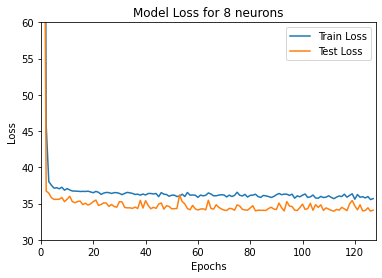

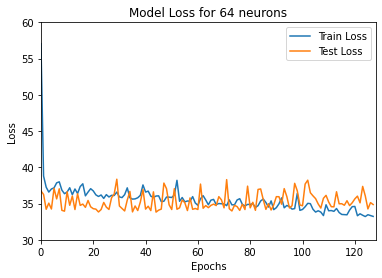

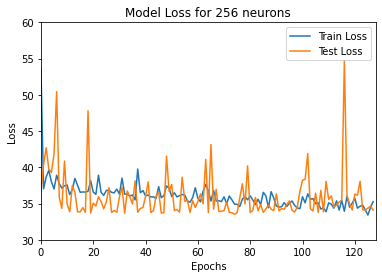

In [78]:
#PLOT THE TRAINING LOSS
import matplotlib.pyplot as plt


for i in range(len(mlp_neurons)):
    mlp_history = mlp_neurons[i]
    loss = mlp_history.history['loss']
    val_loss = mlp_history.history['val_loss']

    plt.plot(mlp_history.history['loss'], label='Train Loss')
    plt.plot(mlp_history.history['val_loss'], label='Test Loss')
    
    plt.title('Model Loss for '+str(n_neurons[i])+' neurons')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(loc='upper right')
    
    ax = plt.gca()
    ax.set_xlim([0, 128])
    ax.set_ylim([30, 60])
    plt.show();

In [79]:
#MODEL EVALUATION via RMSE
for i in range(len(n_neurons)):
    print('Model with', n_neurons[i], 'layers:')
    train_score = models_neurons[i].evaluate(trainX, trainY, verbose=0)
    print('Train Root Mean Squared Error(RMSE): ', train_score)
    test_score = models_neurons[i].evaluate(testX, testY, verbose=0)
    print('Test Root Mean Squared Error(RMSE): ', test_score)

Model with 8 layers:
Train Root Mean Squared Error(RMSE):  35.53559494018555
Test Root Mean Squared Error(RMSE):  40.18723678588867
Model with 64 layers:
Train Root Mean Squared Error(RMSE):  33.5410270690918
Test Root Mean Squared Error(RMSE):  41.78893280029297
Model with 256 layers:
Train Root Mean Squared Error(RMSE):  33.28550338745117
Test Root Mean Squared Error(RMSE):  40.440773010253906


Although the average loss is very slightly higher for 8 neurons, it is a lot smoother as seen on the plots. Let's try with different number of epochs.

#### #3 EPOCHS

We use the best model so far: 4 layers with 8 neurons in each hidden layer. 

In [48]:
n_epochs = [16, 128, 256]

tf.keras.backend.clear_session()

models_epochs = []

for i in range(len(n_epochs)):
    tf.keras.backend.clear_session()
    layers = []                                          #contains all layers to facilitate access to last layer
                                                         #created in API
    
    inputs = Input(shape=(look_back,))                   #input layer with look_back size
    layers.append(inputs)                                #add input to layer list 
    
    for j in range(4):
        
        dense = Dense(8, activation='relu')(layers[j]) # 8 neurons in each model
        layers.append(dense)                             
                                                         
                    
    dense = Dense(1, activation='relu')(dense)           #last layer
    model = Model(inputs = inputs, outputs=dense)        #create model
    models_epochs.append(model)  
    
mlp_epochs = []

for i in range(len(n_epochs)):
    tf.keras.backend.clear_session()
    model = models_epochs[i]
    model.compile(optimizer='adam', loss=rmse) 
    history = model.fit(trainX, trainY, epochs=n_epochs[i], validation_split=0.2)
    mlp_epochs.append(history)

Epoch 1/16
32/32 [==============================] - 1s 7ms/step - loss: 123.6336 - val_loss: 103.1978
Epoch 2/16
32/32 [==============================] - 0s 3ms/step - loss: 50.8200 - val_loss: 39.1218
Epoch 3/16
32/32 [==============================] - 0s 4ms/step - loss: 38.9278 - val_loss: 36.6333
Epoch 4/16
32/32 [==============================] - 0s 4ms/step - loss: 38.3570 - val_loss: 36.2613
Epoch 5/16
32/32 [==============================] - 0s 3ms/step - loss: 37.9438 - val_loss: 36.0380
Epoch 6/16
32/32 [==============================] - 0s 3ms/step - loss: 37.8562 - val_loss: 36.0287
Epoch 7/16
32/32 [==============================] - 0s 3ms/step - loss: 37.9081 - val_loss: 35.7324
Epoch 8/16
32/32 [==============================] - 0s 3ms/step - loss: 37.5832 - val_loss: 35.6481
Epoch 9/16
32/32 [==============================] - 0s 3ms/step - loss: 37.5943 - val_loss: 35.6148
Epoch 10/16
32/32 [==============================] - 0s 3ms/step - loss: 37.4937 - val_loss: 35.63

32/32 [==============================] - 0s 3ms/step - loss: 36.6062 - val_loss: 35.3252
Epoch 18/256
32/32 [==============================] - 0s 3ms/step - loss: 37.2263 - val_loss: 35.4444
Epoch 19/256
32/32 [==============================] - 0s 3ms/step - loss: 36.7521 - val_loss: 35.1467
Epoch 20/256
32/32 [==============================] - 0s 4ms/step - loss: 37.3211 - val_loss: 34.8842
Epoch 21/256
32/32 [==============================] - 0s 6ms/step - loss: 36.7494 - val_loss: 34.9115
Epoch 22/256
32/32 [==============================] - 0s 3ms/step - loss: 36.6728 - val_loss: 34.9507
Epoch 23/256
32/32 [==============================] - 0s 3ms/step - loss: 36.6996 - val_loss: 35.4116
Epoch 24/256
32/32 [==============================] - 0s 3ms/step - loss: 36.7127 - val_loss: 35.0234
Epoch 25/256
32/32 [==============================] - 0s 4ms/step - loss: 37.2566 - val_loss: 35.0454
Epoch 26/256
32/32 [==============================] - 0s 4ms/step - loss: 36.6900 - val_loss: 3

32/32 [==============================] - 0s 3ms/step - loss: 35.7228 - val_loss: 34.2907
Epoch 177/256
32/32 [==============================] - 0s 3ms/step - loss: 35.4878 - val_loss: 34.1409
Epoch 178/256
32/32 [==============================] - 0s 3ms/step - loss: 35.7571 - val_loss: 34.1264
Epoch 179/256
32/32 [==============================] - 0s 3ms/step - loss: 35.4035 - val_loss: 34.0225
Epoch 180/256
32/32 [==============================] - 0s 4ms/step - loss: 35.4701 - val_loss: 34.3356
Epoch 181/256
32/32 [==============================] - 0s 3ms/step - loss: 35.9570 - val_loss: 34.8920
Epoch 182/256
32/32 [==============================] - 0s 3ms/step - loss: 35.4825 - val_loss: 34.0814
Epoch 183/256
32/32 [==============================] - 0s 4ms/step - loss: 35.6604 - val_loss: 34.1042
Epoch 184/256
32/32 [==============================] - 0s 4ms/step - loss: 35.4034 - val_loss: 34.1044
Epoch 185/256
32/32 [==============================] - 0s 3ms/step - loss: 35.6101 - va

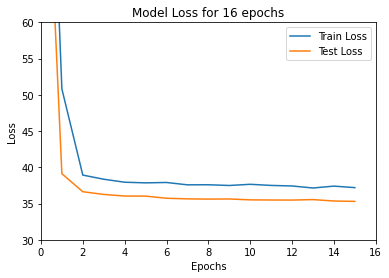

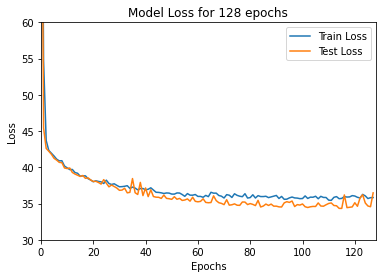

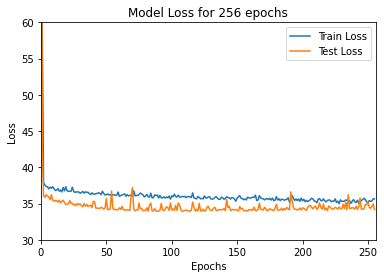

In [49]:
#PLOT THE TRAINING LOSS
import matplotlib.pyplot as plt


for i in range(len(mlp_epochs)):
    mlp_history = mlp_epochs[i]
    loss = mlp_history.history['loss']
    val_loss = mlp_history.history['val_loss']

    plt.plot(mlp_history.history['loss'], label='Train Loss')
    plt.plot(mlp_history.history['val_loss'], label='Test Loss')
    
    plt.title('Model Loss for '+str(n_epochs[i])+' epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(loc='upper right')
    
    ax = plt.gca()
    ax.set_xlim([0, n_epochs[i]])
    ax.set_ylim([30, 60])
    plt.show();

The loss converges around 100 epochs and does not go below 30. A small number of epochs is appropriate for this model. We can use 128 epochs.

#### BEST MODEL

Our best model was with 4 layers, 8 neurons in each layer, and 128 epochs.

In [68]:
best_model = models_epochs[2]

10/10 [==============================] - 0s 2ms/step


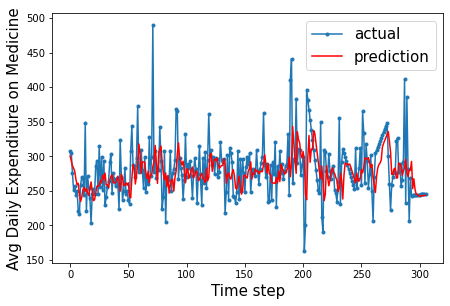

In [69]:
# Demonstrate Prediction and Create Plot to Compare Prediction to Actual
short = 313 #how much of the test sequence to plot (currently: all of it)
test_predict = best_model.predict(testX)

def prediction_plot(testY, test_predict):
  len_prediction=[x for x in range(len(testY[:short]))]
  plt.plot(len_prediction, testY[:short], marker='.', label="actual")
  plt.plot(len_prediction, test_predict[:short], 'r', label="prediction")
  plt.tight_layout()
  plt.subplots_adjust(left=0.07)
  plt.ylabel('Avg Daily Expenditure on Medicine', size=15)
  plt.xlabel('Time step', size=15)
  plt.legend(fontsize=15)
  plt.show();

prediction_plot(testY, test_predict)

#### #1 Find d in ARIMA

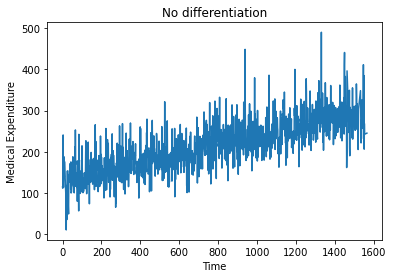

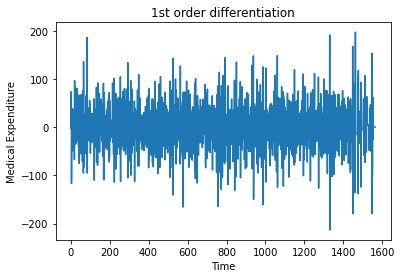

In [59]:
# Plot the data to find d
data1.plot()
plt.title('No differentiation')
plt.ylabel('Medical Expenditure')
plt.xlabel('Time')
plt.show()
data1.diff().plot()
plt.title('1st order differentiation')
plt.ylabel('Medical Expenditure')
plt.xlabel('Time')
plt.show()


The time series is non-stationary and requires differentiation. Here we find that a first order of differentiation is appropriate. Therefore d = 1.

#### #2 Find p in ARIMA

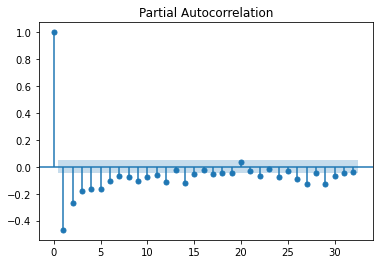

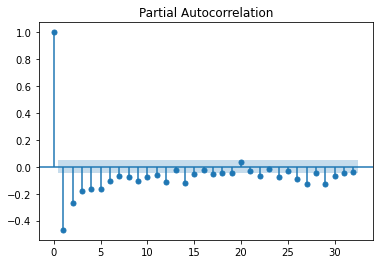

In [56]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf
plot_pacf(data1.diff().dropna())

Parameter p is the order of autoregressive part in an ARIMA model. We can plot the autocorrelation to find the optimum value for p. Here, the first two lags are significantly out of limit while the next four ones converge around -0.2. We can therefore select p = 2.

#### #3 Find q in ARIMA

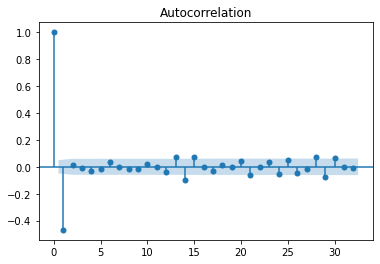

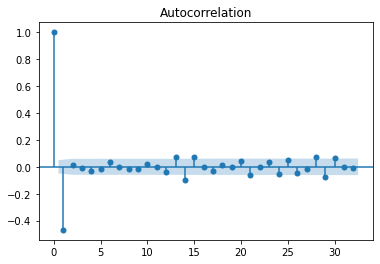

In [60]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data1.diff().dropna())

Parameter q is the order of moving average part. Here we see that the first 2 lags are significantly out of the limit. Therefore we select q = 2.

#### #4 Best ARIMA model

The ARIMA model selected is p = 2, d = 1, q = 2.

In [44]:
%%time
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

#ARIMA model training and prediction (NOTE: training may take ~10min)
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = sm.tsa.arima.ARIMA(history, order=(2,1,2)) #p = 2, d = 1, q = 2
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	#print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 1603.676
CPU times: user 3min 51s, sys: 1.87 s, total: 3min 53s
Wall time: 2min 51s


In [62]:
import math
print('ARIMA model:')
print('Test MSE: %.3f' % error)

RMSE_best_MLP = 40.18723678588867 #calculated above
MSE_best_MLP = RMSE_best_MLP**2
dif = (MSE_best_MLP-error)/error

print('The relative error from the best MLP model is ',dif,'%.')
print('The ARIMA model has a very slighly better MSE, however its computation time is a lot longer: 3min51s for ARIMA compared to only a couple seconds for MLP. The best MLP model from problem 3 is therefore slightly better.')
print('Both models are however still not good enough as the MSE remains very high and above 1600.')


ARIMA model:
Test MSE: 1603.676
The relative error from the best MLP model is  0.007069933445197238 %.
The ARIMA model has a very slighly better MSE, however its computation time is a lot longer: 3min51s for ARIMA compared to only a couple seconds for MLP. The best MLP model from problem 3 is therefore slightly better.
Both models are however still not good enough as the MSE remains very high and above 1600.


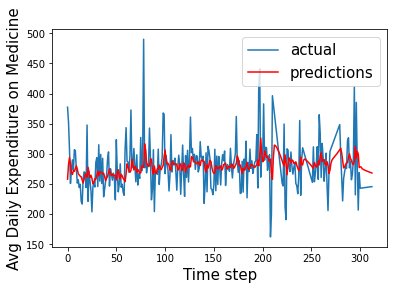

In [63]:
from matplotlib import pyplot
# plotting actual vs. ARIMA prediction
pyplot.plot(test, label='actual')
pyplot.plot(predictions, color='red', label='predictions')
pyplot.ylabel('Avg Daily Expenditure on Medicine', size=15)
pyplot.xlabel('Time step', size=15)
pyplot.legend(fontsize=15)
pyplot.show()